In [1]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1101135932673569304,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 920718439557952274
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6918604064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6490775197711340937
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1664497059584204736
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
import keras
from keras.models import Sequential, Model
from keras import layers, applications, optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [5]:
epoch = 100
batch_size = 5
image_size = 224

In [6]:
#load train data(25000 imgs each)

filenames = os.listdir('./input/train/train')
data = []
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
    
    image = keras.preprocessing.image.load_img(os.path.join('./input/train/train', filename),
                                               color_mode='rgb',
                                               target_size= (image_size,image_size))
    image = np.array(image)
    data.append(image)

data = np.array(data)
categories = np.array(categories)

print(data)
print(categories)

[[[[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 203 119]
   [241 202 123]
   [239 200 121]]

  [[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 205 120]
   [242 203 124]
   [240 201 122]]

  [[203 164  87]
   [206 167  90]
   [209 170  93]
   ...
   [245 204 122]
   [243 204 125]
   [241 202 123]]

  ...

  [[154 123  56]
   [155 124  57]
   [156 125  58]
   ...
   [  3   3   1]
   [  3   3   1]
   [  3   3   1]]

  [[153 122  55]
   [153 122  55]
   [154 123  56]
   ...
   [  2   2   0]
   [  2   2   0]
   [  2   2   0]]

  [[151 120  53]
   [152 121  54]
   [153 122  55]
   ...
   [  1   1   0]
   [  1   1   0]
   [  1   1   0]]]


 [[[ 39  44  40]
   [ 40  44  43]
   [ 41  45  46]
   ...
   [210 209 181]
   [207 204 171]
   [201 199 161]]

  [[ 40  45  41]
   [ 40  44  43]
   [ 41  45  46]
   ...
   [207 203 176]
   [203 200 169]
   [197 195 157]]

  [[ 39  44  40]
   [ 38  42  41]
   [ 37  41  42]
   ...
   [195 191 166]
   [198 193 164]
   [205 200

In [7]:
# shuffle dataset

idx = np.random.permutation(len(data))
data, categories = data[idx], categories[idx]

In [8]:
# split train 6(15,000) / val 2(5,000) / test 2(5,000)

x_train = data[:15000]
y_train = categories[:15000]
x_temp, y_temp = data[-10000:], categories[-10000:]

from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [9]:
print(x_train, y_train)

print(x_temp, y_temp)
print(x_temp.shape, y_temp.shape)

print(x_val, y_val)

print(x_test, y_test)
print(x_test.shape, y_test.shape)

[[[[ 67  63  36]
   [ 66  60  36]
   [ 66  54  38]
   ...
   [ 24  23  21]
   [ 12   0   0]
   [ 63  51  39]]

  [[ 61  57  32]
   [ 63  55  34]
   [ 64  52  36]
   ...
   [ 15  14  12]
   [ 13   3   0]
   [ 60  50  40]]

  [[ 61  54  35]
   [ 60  51  34]
   [ 59  47  33]
   ...
   [  8   7   5]
   [ 19  14   8]
   [ 60  55  49]]

  ...

  [[ 91 113 124]
   [ 91 113 126]
   [ 88 112 124]
   ...
   [ 61  60  55]
   [ 88  79  36]
   [116 108  61]]

  [[ 94 116 127]
   [ 89 111 124]
   [ 91 115 127]
   ...
   [ 66  63  58]
   [ 61  52  13]
   [100  91  48]]

  [[ 84 106 117]
   [ 74  96 109]
   [ 82 106 118]
   ...
   [ 82  78  75]
   [ 55  45  10]
   [ 87  77  41]]]


 [[[ 32  43  27]
   [ 27  39  19]
   [ 49  62  36]
   ...
   [189 164 144]
   [191 166 146]
   [192 167 147]]

  [[ 33  46  28]
   [ 33  47  24]
   [ 43  57  31]
   ...
   [184 159 139]
   [186 161 141]
   [188 163 143]]

  [[ 24  43  21]
   [ 19  39  12]
   [ 27  48  17]
   ...
   [182 160 139]
   [185 163 142]
   [188 166

In [10]:
def build_resnet_block(input_layer, num_cnn=3, channel=64, block_num=1,is_50 = False,is_plain = False):

    x = input_layer
    
    if not is_50:
    # CNN 레이어
        for cnn_num in range(num_cnn):
            identity = x
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_conv{cnn_num}'
            )(x)
            x = keras.layers.BatchNormalization()(x)
            x = keras.layers.Conv2D(
                filters=channel,
                kernel_size=(3,3),
                activation='relu',
                kernel_initializer='he_normal',
                padding='same',
                name=f'block{block_num}_1_conv{cnn_num}'
            )(x)
            if not is_plain:
                identity_channel = identity.shape.as_list()[-1]    

                if identity_channel != channel:
                    identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
                # skip connection
                x = keras.layers.Add()([x,identity])   
            else:
                pass
    else :
        identity = x
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(1,1),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_1_conv{cnn_num}'
        )(x)
        x = keras.layers.Conv2D(
            filters=channel * 4,
            kernel_size=(1,1),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_2_conv{cnn_num}'
        )(x)
        if not is_plain:
            identity_channel = identity.shape.as_list()[-1]    

            if identity_channel != channel:
                identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
            # skip connection
            x = keras.layers.Add()([x,identity])   
        else:
            pass
    # Max Pooling 레이어
    # 마지막 블록 뒤에는 pooling을 하지 않음
    if identity.shape[1] != 1:        
        x = keras.layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2,
            name=f'block{block_num}_pooling'
        )(x)

    return x

In [11]:
def build_resnet(input_shape=(image_size,image_size,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=10,is_50 = False, is_plain = False):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    if is_50:
        num_cnn_list = [3,4,6,3]
        channel_list = [64,128,256,512]
        num_classes = 10
        
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    #conv1층
    output = keras.layers.Conv2D(filters=64,
                       kernel_size = (2,2),
                       strides = 2,
                         padding = 'valid')(output)
    output = keras.layers.BatchNormalization()(output)
    
    #conv2_x pooling
    output = keras.layers.MaxPooling2D(pool_size = (2,2),
                                      strides = 2,)(output)    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
    output = keras.layers.AveragePooling2D(padding = 'same')(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(512, activation='relu', name='fc1')(output)    
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

In [12]:
resnet_34 = build_resnet(is_50=False)
resnet_50 = build_resnet(is_50=True)
plain_resnet_34 = build_resnet(is_50=False, is_plain=True)
plain_resnet_50 = build_resnet(is_50=True, is_plain=True)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localho

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:loc

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localho

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:lo

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localh

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/repl

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /j

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/repl

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localho

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/repli

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:lo

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localh

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/repl

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/r

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /j

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/repl

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localho

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/re

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:lo

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localh

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/r

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
# %load_ext tensorboard

# import datetime

In [14]:
model = build_resnet()

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localho

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:loc

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localho

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:lo

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localh

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/repl

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [15]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy']
)

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

In [16]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 112, 112, 64) 832         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_68 (BatchNo (None, 112, 112, 64) 256         conv2d_16[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 56, 56, 64)   0           batch_normalization_68[0][0]     
_______________________________________________________________________________________

In [17]:
# log_dir = "logs/resnet/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('resnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001)

In [20]:
# without early stopping

epoch = 50

history = model.fit(
    x_train, y_train,
    epochs=epoch,
    validation_data=(x_val, y_val),
    verbose=1,
    #callbacks=[tensorboard_callback, reduce_lr]
    callbacks=[reduce_lr]
)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localho

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /j

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device 

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:loc

 48/469 [==>...........................] - ETA: 31s - loss: nan - accuracy: 0.4857Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 93/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4963Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


138/469 [=======>......................] - ETA: 24s - loss: nan - accuracy: 0.4980Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


183/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.4983Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


228/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


273/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5003Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


318/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.4994Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


363/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


408/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


453/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5009Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadV

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 65/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.4798Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


110/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.4895Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


155/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.4897Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


200/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4966Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


245/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.4997Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


290/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


335/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5051Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


380/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


425/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 3/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5102Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5067Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


133/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5054Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


178/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5042Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


223/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5049Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


268/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5056Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


313/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5053Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


358/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5038Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


403/469 [========================>.....] - ETA: 4s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


448/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 65/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5005Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


110/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.4991Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


155/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.4984Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


200/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4995Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


245/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5014Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


290/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.4986Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


335/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


380/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


425/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 5/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5160Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5117Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


133/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5026Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


178/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


223/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


268/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


313/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5044Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


358/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5041Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


403/469 [========================>.....] - ETA: 4s - loss: nan - accuracy: 0.5028Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


448/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 64/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5107Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


109/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


154/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5093Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


199/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5061Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


244/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5042Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


289/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5002Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


334/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.4998Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


379/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5010Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


424/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/devi

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 7/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 42/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.4933Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 87/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4860Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


132/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4991Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


177/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4991Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


222/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.4959Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


267/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.4981Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


312/469 [==================>...........] - ETA: 11s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


357/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


402/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


447/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 65/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.4962Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


110/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.4952Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


155/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.4992Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


200/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


245/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


290/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


335/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5001Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


380/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


425/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 9/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5036Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


133/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4981Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


178/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.4958Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


223/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


268/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


313/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


358/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5014Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


403/469 [========================>.....] - ETA: 4s - loss: nan - accuracy: 0.5050Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


448/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 65/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5197Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


110/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5045Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


155/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


200/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4988Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


245/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


290/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


335/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


380/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


425/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 11/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5091Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 86/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


131/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4931Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


176/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4989Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


221/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.4992Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


266/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5015Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


311/469 [==================>...........] - ETA: 11s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


356/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


401/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


446/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 63/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.4911Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


108/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4931Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


153/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


198/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


243/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5057Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


288/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5056Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


333/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5060Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


378/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5039Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


423/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


468/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 13/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:

 85/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5007Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


130/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5041Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


175/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4971Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


220/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5001Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


265/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.4978Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


310/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


355/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5035Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


400/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


445/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5034Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 62/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.4889Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


107/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4819Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


152/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.4875Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


197/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4925Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


242/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.4935Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


287/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.4974Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


332/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5015Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


377/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5027Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


422/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


467/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 15/50
Executing op __inference_train_function_14714 in device /job:localhost/replica

 84/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4818Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


129/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4927Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


174/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4962Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


219/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.4980Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


264/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


309/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


354/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5041Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


399/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5028Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


444/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 60/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.4911Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


105/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4961Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


150/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


195/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5038Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


240/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5049Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


285/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5032Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


330/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5045Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


375/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


420/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


465/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5015Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp 

 82/469 [====>.........................] - ETA: 29s - loss: nan - accuracy: 0.5050Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


127/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4980Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


172/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4982Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


217/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


262/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5068Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


307/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5033Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


352/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


397/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


442/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 60/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.5073Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


105/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4979Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


150/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


195/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


240/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5003Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


285/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


330/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5002Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


375/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


420/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


465/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp 

 82/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


127/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4958Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


172/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4964Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


217/469 [============>.................] - ETA: 18s - loss: nan - accuracy: 0.4970Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


262/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5002Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


307/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


352/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


397/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


442/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 60/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.5141Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


105/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5033Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


150/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5015Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


195/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


240/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5040Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


285/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.4985Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


330/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5010Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


375/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


420/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


465/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5015Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU

 81/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4958Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


126/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4970Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


171/469 [=========>....................] - ETA: 22s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


216/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5026Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


261/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


306/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5014Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


351/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.4996Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


396/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.4987Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


441/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 59/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.5090Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


104/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5069Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


149/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5063Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


194/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


239/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5046Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


284/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


329/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5050Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


374/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5038Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


419/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


464/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step 

 82/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4943Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


127/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4934Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


172/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4916Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


217/469 [============>.................] - ETA: 18s - loss: nan - accuracy: 0.4940Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


262/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.4938Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


307/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.4944Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


352/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.4974Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


397/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.4985Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


442/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.4997Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 60/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.4953Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


105/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


150/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


195/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


240/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


285/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.4989Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


330/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.4992Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


375/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5002Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


420/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


465/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp 

 82/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5034Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


127/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4993Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


172/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.4998Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


217/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


262/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5036Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


307/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5067Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


352/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


397/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5055Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


442/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5027Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 59/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


104/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5069Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


149/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5063Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


194/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


239/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.4973Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


284/469 [=================>............] - ETA: 14s - loss: nan - accuracy: 0.4943Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


329/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.4955Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


374/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.4940Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


419/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.4990Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


464/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/repl

 81/469 [====>.........................] - ETA: 29s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


126/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


171/469 [=========>....................] - ETA: 22s - loss: nan - accuracy: 0.4993Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


216/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.4971Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


261/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


306/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5028Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


351/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


396/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


441/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5010Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 58/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.5081Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


103/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5030Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


148/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5059Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


193/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


238/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5034Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


283/469 [=================>............] - ETA: 14s - loss: nan - accuracy: 0.5033Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


328/469 [===================>..........] - ETA: 10s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


373/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


418/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


463/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5027Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Read

 80/469 [====>.........................] - ETA: 29s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


125/469 [======>.......................] - ETA: 25s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


170/469 [=========>....................] - ETA: 22s - loss: nan - accuracy: 0.4982Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


215/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5055Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


260/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


305/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5033Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


350/469 [=====================>........] - ETA: 9s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


395/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


440/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 57/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.4896Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


102/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4960Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


147/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.4972Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


192/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4985Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


237/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


282/469 [=================>............] - ETA: 14s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


327/469 [===================>..........] - ETA: 10s - loss: nan - accuracy: 0.5031Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


372/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5003Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


417/469 [=========================>....] - ETA: 3s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


462/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 78/469 [===>..........................] - ETA: 29s - loss: nan - accuracy: 0.5064Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


123/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5127Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


168/469 [=========>....................] - ETA: 22s - loss: nan - accuracy: 0.5080Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


213/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5079Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


258/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5093Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


303/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5073Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


348/469 [=====================>........] - ETA: 9s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


393/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5041Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


438/469 [===========================>..] - ETA: 2s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 54/469 [==>...........................] - ETA: 30s - loss: nan - accuracy: 0.4988Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 99/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5054Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


144/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5046Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


189/469 [===========>..................] - ETA: 21s - loss: nan - accuracy: 0.5035Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


234/469 [=============>................] - ETA: 17s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


279/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5030Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


324/469 [===================>..........] - ETA: 10s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


369/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


414/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


459/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 75/469 [===>..........................] - ETA: 31s - loss: nan - accuracy: 0.4975Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


120/469 [======>.......................] - ETA: 27s - loss: nan - accuracy: 0.4974Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


165/469 [=========>....................] - ETA: 23s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


210/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.4985Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


255/469 [===============>..............] - ETA: 16s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


300/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.4995Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


345/469 [=====================>........] - ETA: 9s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


390/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


435/469 [==========================>...] - ETA: 2s - loss: nan - accuracy: 0.5036Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 52/469 [==>...........................] - ETA: 31s - loss: nan - accuracy: 0.5156Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 97/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5100Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


142/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.5037Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


187/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5005Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


232/469 [=============>................] - ETA: 17s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


277/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


322/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5038Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


367/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.5026Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


412/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


457/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5024Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 74/469 [===>..........................] - ETA: 29s - loss: nan - accuracy: 0.5072Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


119/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5074Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


164/469 [=========>....................] - ETA: 22s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


209/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5081Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


254/469 [===============>..............] - ETA: 16s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


299/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


344/469 [=====================>........] - ETA: 9s - loss: nan - accuracy: 0.4989Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


389/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.4996Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


434/469 [==========================>...] - ETA: 2s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 51/469 [==>...........................] - ETA: 31s - loss: nan - accuracy: 0.4865Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 96/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.4863Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


141/469 [========>.....................] - ETA: 24s - loss: nan - accuracy: 0.4965Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


186/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.4995Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


231/469 [=============>................] - ETA: 17s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


276/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5005Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


321/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


366/469 [======================>.......] - ETA: 7s - loss: nan - accuracy: 0.4974Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


411/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.4999Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


456/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 72/469 [===>..........................] - ETA: 29s - loss: nan - accuracy: 0.5074Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


117/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5067Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


162/469 [=========>....................] - ETA: 23s - loss: nan - accuracy: 0.5123Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


207/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5137Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


252/469 [===============>..............] - ETA: 16s - loss: nan - accuracy: 0.5087Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


297/469 [=================>............] - ETA: 12s - loss: nan - accuracy: 0.5076Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


342/469 [====================>.........] - ETA: 9s - loss: nan - accuracy: 0.5073Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


387/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5040Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


432/469 [==========================>...] - ETA: 2s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 48/469 [==>...........................] - ETA: 31s - loss: nan - accuracy: 0.5143Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 93/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5071Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


138/469 [=======>......................] - ETA: 24s - loss: nan - accuracy: 0.5057Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


183/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


228/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


273/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5037Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


318/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5032Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


363/469 [======================>.......] - ETA: 8s - loss: nan - accuracy: 0.5054Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


408/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.5044Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


453/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5021Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 70/469 [===>..........................] - ETA: 29s - loss: nan - accuracy: 0.5094Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


115/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5052Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


160/469 [=========>....................] - ETA: 23s - loss: nan - accuracy: 0.5045Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


205/469 [============>.................] - ETA: 19s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


250/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


295/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5068Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


340/469 [====================>.........] - ETA: 9s - loss: nan - accuracy: 0.5056Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


385/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5028Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


430/469 [==========================>...] - ETA: 2s - loss: nan - accuracy: 0.5030Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 47/469 [==>...........................] - ETA: 31s - loss: nan - accuracy: 0.5086Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 92/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5129Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


137/469 [=======>......................] - ETA: 24s - loss: nan - accuracy: 0.5171Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


182/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5204Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


227/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5195Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


272/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5167Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


317/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5112Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


362/469 [======================>.......] - ETA: 8s - loss: nan - accuracy: 0.5099Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


407/469 [=========================>....] - ETA: 4s - loss: nan - accuracy: 0.5069Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


452/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5028Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 69/469 [===>..........................] - ETA: 29s - loss: nan - accuracy: 0.5027Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


114/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.4942Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


159/469 [=========>....................] - ETA: 23s - loss: nan - accuracy: 0.4953Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


204/469 [============>.................] - ETA: 20s - loss: nan - accuracy: 0.4959Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


249/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.4975Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


294/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


339/469 [====================>.........] - ETA: 9s - loss: nan - accuracy: 0.4995Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


384/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5005Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


429/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5023Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 46/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5136Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 91/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5082Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


136/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5062Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


181/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


226/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


271/469 [================>.............] - ETA: 14s - loss: nan - accuracy: 0.5046Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


316/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5058Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


361/469 [======================>.......] - ETA: 8s - loss: nan - accuracy: 0.5039Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


406/469 [========================>.....] - ETA: 4s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


451/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5036Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 68/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


113/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.4970Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


158/469 [=========>....................] - ETA: 23s - loss: nan - accuracy: 0.4960Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


203/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5003Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


248/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.4996Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


293/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


338/469 [====================>.........] - ETA: 9s - loss: nan - accuracy: 0.5013Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


383/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


428/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5006Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 45/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5118Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 90/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5111Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


135/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


180/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5035Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


225/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.4994Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


270/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.4979Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


315/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.4974Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


360/469 [======================>.......] - ETA: 8s - loss: nan - accuracy: 0.4975Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


405/469 [========================>.....] - ETA: 4s - loss: nan - accuracy: 0.5001Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


450/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5012Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 66/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5137Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


111/469 [======>.......................] - ETA: 26s - loss: nan - accuracy: 0.5068Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


156/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


201/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5078Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


246/469 [==============>...............] - ETA: 16s - loss: nan - accuracy: 0.5090Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


291/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


336/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5041Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


381/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5029Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


426/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5034Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 46/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.4804Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.4915Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


133/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.4937Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


178/469 [==========>...................] - ETA: 21s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


223/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5048Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


268/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5045Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


313/469 [===================>..........] - ETA: 11s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


358/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.4975Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


403/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.4984Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


448/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5016Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 64/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.4985Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


109/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


154/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.4980Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


199/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.4992Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


244/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.4997Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


289/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5018Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


334/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5039Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


379/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.5014Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


424/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.4999Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/devi

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 48/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 41/469 [=>............................] - ETA: 31s - loss: nan - accuracy: 0.5091Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


 86/469 [====>.........................] - ETA: 29s - loss: nan - accuracy: 0.4975Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


131/469 [=======>......................] - ETA: 26s - loss: nan - accuracy: 0.4993Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


176/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


221/469 [=============>................] - ETA: 19s - loss: nan - accuracy: 0.4999Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


266/469 [================>.............] - ETA: 15s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


311/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5019Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


356/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5036Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


401/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5032Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


446/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5025Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


 63/469 [===>..........................] - ETA: 30s - loss: nan - accuracy: 0.5060Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


108/469 [=====>........................] - ETA: 27s - loss: nan - accuracy: 0.5136Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


153/469 [========>.....................] - ETA: 23s - loss: nan - accuracy: 0.5063Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


198/469 [===========>..................] - ETA: 20s - loss: nan - accuracy: 0.5082Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


243/469 [==============>...............] - ETA: 17s - loss: nan - accuracy: 0.5102Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


288/469 [=================>............] - ETA: 13s - loss: nan - accuracy: 0.5047Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


333/469 [====================>.........] - ETA: 10s - loss: nan - accuracy: 0.5008Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


378/469 [=======================>......] - ETA: 6s - loss: nan - accuracy: 0.4986Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


423/469 [==========================>...] - ETA: 3s - loss: nan - accuracy: 0.5009Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


468/469 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
469/469 [==============================] - 39s 84ms/step - loss: nan - accuracy: 0.5020 - val_loss: nan - val_accuracy: 0.4980
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 50/50
Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0
 39/469 [=>......

 84/469 [====>.........................] - ETA: 28s - loss: nan - accuracy: 0.5000Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


129/469 [=======>......................] - ETA: 25s - loss: nan - accuracy: 0.5017Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


174/469 [==========>...................] - ETA: 22s - loss: nan - accuracy: 0.5004Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


219/469 [=============>................] - ETA: 18s - loss: nan - accuracy: 0.5033Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


264/469 [===============>..............] - ETA: 15s - loss: nan - accuracy: 0.5011Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


309/469 [==================>...........] - ETA: 12s - loss: nan - accuracy: 0.5059Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


354/469 [=====================>........] - ETA: 8s - loss: nan - accuracy: 0.5060Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


399/469 [========================>.....] - ETA: 5s - loss: nan - accuracy: 0.5026Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


444/469 [===========================>..] - ETA: 1s - loss: nan - accuracy: 0.5022Executing op __inference_train_function_14714 in device /job:localhost/replica:0/task:0/device:GPU:0


469/469 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5020Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313

Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_16313 in device /job:localhost/replica:0/task:0/device:GPU:0


In [21]:
# %tensorboard --logdir logs/resnet

train loss: nan
train accuracy: 0.5019999742507935
dev loss: nan
dev accuracy: 0.49799999594688416


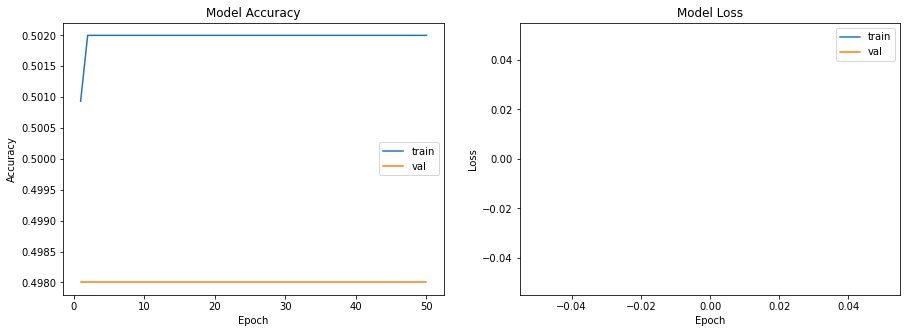

In [22]:
print('train loss:', history.history['loss'][-1])
print('train accuracy:', history.history['accuracy'][-1])

print('dev loss:', history.history['val_loss'][-1])
print('dev accuracy:', history.history['val_accuracy'][-1])

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(range(1,len(history.history['accuracy'])+1), history.history['accuracy'])
axs[0].plot(range(1,len(history.history['val_accuracy'])+1),history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='best')

axs[1].plot(range(1,len(history.history['loss'])+1),history.history['loss'])
axs[1].plot(range(1,len(history.history['val_loss'])+1),history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='best')

plt.show()

In [23]:
# test_loss, test_acc = model.evaluate(x_test, y_test)

In [24]:
# print('test loss:', test_loss)
# print('test accuracy:', test_acc)

In [25]:
predictions = model.predict(x_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/

Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_predict_function_79317 in device /job:localhost/

In [26]:
print(predictions)

y_pred = []

for i in predictions:
    if i[0] < i[1]:
        y_pred.append(1)
    else:
        y_pred.append(0)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [27]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)

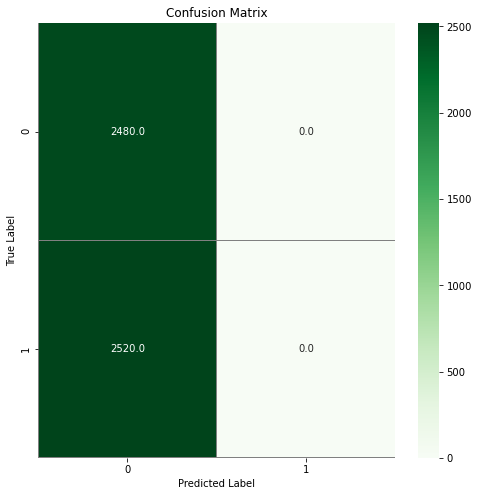

In [28]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens",linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [29]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['cat', 'dog'])

C:\Users\pomat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pomat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pomat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(report)

              precision    recall  f1-score   support

         cat       0.50      1.00      0.66      2480
         dog       0.00      0.00      0.00      2520

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000

